<a href="https://colab.research.google.com/github/Tien84/Face_Detection/blob/master/demolstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('/content/driver/My Drive/LSTM_Model/DataBitcoin.csv')
#data= data[::-1] 
data.index.freg='Date'
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-10,265.477997,267.032013,262.596008,264.470001,264.470001,20979400
1,2015-08-11,264.342010,270.385986,264.093994,270.385986,270.385986,25433900
2,2015-08-12,270.597992,270.673004,265.468994,266.376007,266.376007,26815400
3,2015-08-13,266.183014,266.231995,262.841003,264.079987,264.079987,27685500
4,2015-08-14,264.131989,267.466003,261.477997,265.679993,265.679993,27091200
...,...,...,...,...,...,...,...
2553,2022-08-06,23291.423828,23326.562500,22961.279297,22961.279297,22961.279297,15978259885
2554,2022-08-07,22963.505859,23359.009766,22894.556641,23175.890625,23175.890625,15886817043
2555,2022-08-08,23179.527344,24203.689453,23176.546875,23809.486328,23809.486328,28575544847
2556,2022-08-09,23811.484375,23898.615234,22982.000000,23164.318359,23164.318359,23555719219


In [3]:
data.head(), data.tail()

(         Date        Open        High         Low       Close   Adj Close  \
 0  2015-08-10  265.477997  267.032013  262.596008  264.470001  264.470001   
 1  2015-08-11  264.342010  270.385986  264.093994  270.385986  270.385986   
 2  2015-08-12  270.597992  270.673004  265.468994  266.376007  266.376007   
 3  2015-08-13  266.183014  266.231995  262.841003  264.079987  264.079987   
 4  2015-08-14  264.131989  267.466003  261.477997  265.679993  265.679993   
 
      Volume  
 0  20979400  
 1  25433900  
 2  26815400  
 3  27685500  
 4  27091200  ,
             Date          Open          High           Low         Close  \
 2553  2022-08-06  23291.423828  23326.562500  22961.279297  22961.279297   
 2554  2022-08-07  22963.505859  23359.009766  22894.556641  23175.890625   
 2555  2022-08-08  23179.527344  24203.689453  23176.546875  23809.486328   
 2556  2022-08-09  23811.484375  23898.615234  22982.000000  23164.318359   
 2557  2022-08-10  23126.421875  23126.421875  22773.7

In [4]:
open_price = data.iloc[:,1:2]
#open_price = data.iloc[:,2:2]
train_set = open_price[:1791].values
test_set = open_price[1791:].values
print("Train size: ",train_set.shape)
print("Test size:",test_set.shape)

Train size:  (1791, 1)
Test size: (767, 1)


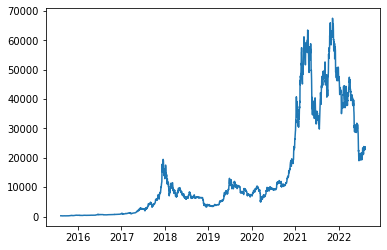

In [5]:
dates = pd.to_datetime(data['Date'])
plt.plot_date(dates,open_price, fmt='-')
plt.savefig("BTC_hinh.png")

In [6]:
len(data)

2558

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras
import warnings
warnings.filterwarnings("ignore")

In [8]:
def get_data(train,test,time_step,num_predict,date):
  x_train= list()
  y_train = list()
  x_test = list()
  y_test = list()
  date_test= list()

  for i in range(0,len(train) - time_step - num_predict):
    x_train.append(train[i:i+time_step])
    y_train.append(train[i+time_step:i+time_step+num_predict])

  for i in range(0, len(test) - time_step - num_predict):
    x_test.append(test[i:i+time_step])
    y_test.append(test[i+time_step:i+time_step+num_predict])
    date_test.append(date[i+time_step:i+time_step+num_predict])
  
  return np.asarray(x_train), np.asarray(y_train), np.asarray(x_test), np.asarray(y_test), np.asarray(date_test)

In [26]:
from sklearn.preprocessing import MinMaxScaler
x_train, y_train, x_test, y_test, date_test = get_data(train_set,test_set,2558,1, dates)

# dua ve 0->1 cho tap train
scaler = MinMaxScaler()
x_train = x_train.reshape(-1,2558)
y_train = x_train.reshape(-1,1)

#train_set_scaled = scaler.fit_transform(train_set)

x_train = scaler.fit_transform(train_set)
y_train = scaler.fit_transform(train_set)

#x_train = scaler.fit_transform(x_train)
#y_train = scaler.fit_transform(y_train)

# dua ve 0->1 cho tap test
x_test = x_test.reshape(-1,768)
y_test = y_test.reshape(-1,1)

x_test = scaler.fit_transform(test_set)
y_test = scaler.fit_transform(test_set)

date_test = date_test.reshape(-1,1)


In [27]:
from keras import Sequential
from keras.layers import LSTM
from keras.layers import Dropout,Dense
#dau vao 768 doan 1
n_input = 768
n_features = 1

model = Sequential()
model.add(LSTM(units=50,activation='relu', input_shape=(n_input, n_features), return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(1))


In [28]:
model.compile(optimizer='adam', loss='mse')

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 768, 50)           10400     
                                                                 
 dropout_6 (Dropout)         (None, 768, 50)           0         
                                                                 
 lstm_7 (LSTM)               (None, 768, 50)           20200     
                                                                 
 dropout_7 (Dropout)         (None, 768, 50)           0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [30]:
history=model.fit(x_train, y_train, epochs=20, validation_split=0.2, verbose=1, batch_size=30)
model.save('/content/driver/My Drive/LSTM_Model/lstm_test')

Epoch 1/20


39/48 [=======================>......] - ETA: 0s - loss: 0.0536

48/48 [==============================] - 6s 27ms/step - loss: 0.0501 - val_loss: 0.0475
Epoch 2/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0293 - val_loss: 0.0233
Epoch 3/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0092 - val_loss: 0.0023
Epoch 4/20
48/48 [==============================] - 0s 8ms/step - loss: 0.0041 - val_loss: 9.1237e-04
Epoch 5/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0031 - val_loss: 8.3286e-04
Epoch 6/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0035 - val_loss: 0.0010
Epoch 7/20
48/48 [==============================] - 0s 8ms/step - loss: 0.0032 - val_loss: 0.0010
Epoch 8/20
48/48 [==============================] - 0s 8ms/step - loss: 0.0030 - val_loss: 1.1117e-04
Epoch 9/20
48/48 [==============================] - 0s 7ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 10/20
48/48 [==============================] - 0s 8ms/step - loss: 0.0031 - val_loss: 7.8816e-04
Epoch 11/20
4

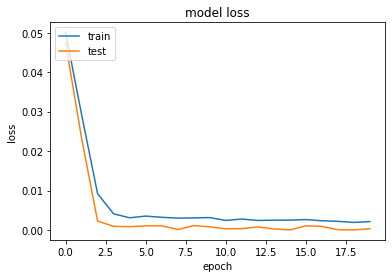

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

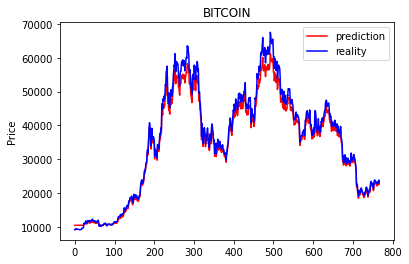

In [32]:
import matplotlib.pyplot as plt
import keras
model = keras.models.load_model('/content/driver/My Drive/LSTM_Model/lstm_test')

test_output = model.predict(x_test)

# print(test_output)
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
plt.plot(test_1[:2558], color='r')
plt.plot(test_2[:2558] ,color='b')
plt.title("BITCOIN")
#plt.xlabel("STT")
plt.ylabel("Price")
plt.legend(('prediction', 'reality'),loc='upper right')
plt.show()

In [33]:
test_1 = scaler.inverse_transform(test_output)
test_2 = scaler.inverse_transform(y_test)
print(test_1)
print(test_2)

[[10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10437.476 ]
 [10448.554 ]
 [10793.472 ]
 [10736.491 ]
 [10846.447 ]
 [10853.308 ]
 [11003.191 ]
 [11331.9795]
 [10809.634 ]
 [10949.082 ]
 [10919.055 ]
 [11324.755 ]
 [11348.332 ]
 [11212.798 ]
 [11314.563 ]
 [11256.587 ]
 [11431.799 ]
 [11061.312 ]
 [11200.542 ]
 [11343.267 ]
 [11340.048 ]
 [11419.645 ]
 [11443.18  ]
 [11743.429 ]
 [11520.531 ]
 [11334.201 ]
 [11428.858 ]
 [11198.32  ]
 [11269.821 ]
 [11257.673 ]
 [11344.021 ]
 [11034.598 ]
 [11122.533 ]
 [11005.122 ]
 [11164.609 ]
 [11140.068 ]
 [11295.327 ]
 [11269.532 ]
 [11499.362 ]
 [11063.15  ]
 [10478.133 ]
 [10551.047 ]
 [10469.987 ]
 [10486.006 ]
 [10504.4795]
 [10466.488 ]
 [10479.993 ]
 [10504.3955]
 [10516.712 ]
 [10529.56  ]
 [1049

In [34]:
# Đánh giá mô hình
score = model.evaluate(x_test, y_test,verbose=1, batch_size = 30)
print('Test Score', score)

26/26 [==============================] - 2s 5ms/step - loss: 0.0012
Test Score 0.0012374481884762645


In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
predictions= model.predict(x_test) 
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 0.035177


In [36]:
mape = np.mean(np.abs(np.array(predictions) - np.array(test_set))/np.abs(test_set))
print('MAPE: ' + str(mape))

MAPE: 0.9999894063094293
